(450, 400)


/home/chiz/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Classifier,Accuracy
0,KNeighborsClassifier,0.829704
0,RandomForestClassifier,0.835259
0,GradientBoostingClassifier,0.823630
0,LogisticRegression,0.849630
0,LinearSVC,0.870074


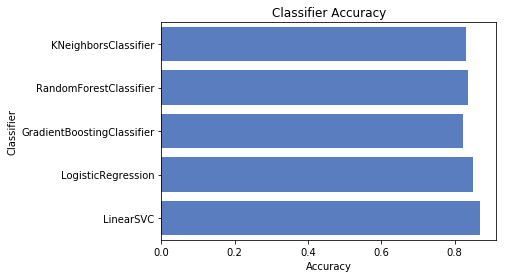

In [1]:
import glob
import numpy as np

pb_files = glob.glob('./PB_dynamic3d/*_*.txt')

pb_files = sorted(pb_files)

data = []

for i in range(len(pb_files)):
    data.append(np.loadtxt(pb_files[i]))

data = np.array(data)

print(data.shape)

y = np.array((50 * [0] + 50 * [1] + 50 * [2] + 50 * [3] + 50 * [4] + 50 * [5] + 50 * [6] + 50 * [7] + 50 * [8]))

train = np.c_[data, y]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

classifiers = [
    KNeighborsClassifier(3),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    LinearSVC()]

log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

X = train[:, :-1]
y = train[:, -1]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:

    acc_dict[clf] = acc_dict[clf] / 100.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

log